# Prediction of Diabetes using ML Classifiers
In this project, different machine learning models are trained and tested for the famous Pima Indians Diabetes Database having 8 features and 1 target label (0 or 1)

# Importing requires libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading the dataset for diabetes prediction

In [5]:
!gdown --id 1zd6kRrIXJ51iXjZgvaqf3QhJgGebTl4S

C:\Users\kanhaiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zd6kRrIXJ51iXjZgvaqf3QhJgGebTl4S
To: D:\C__files\kanhaiyanotebook\Github_Projects\Prediction of Diabetes using ML Classifiers\Pima_Indians_Diabetes_Database.csv

  0%|          | 0.00/23.9k [00:00<?, ?B/s]
100%|##########| 23.9k/23.9k [00:00<00:00, 7.71MB/s]


# Dataset Visualization

In [7]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('Pima_Indians_Diabetes_Database.csv') 
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# check that if our dataset have null values or not
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This dataset does not contain any null values but here many zero values are present because in this particular dataset all the missing values were given the 0. We will replace these zero values with th mean value of the column.

In [11]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Plotting the data distribution plots before removing null values

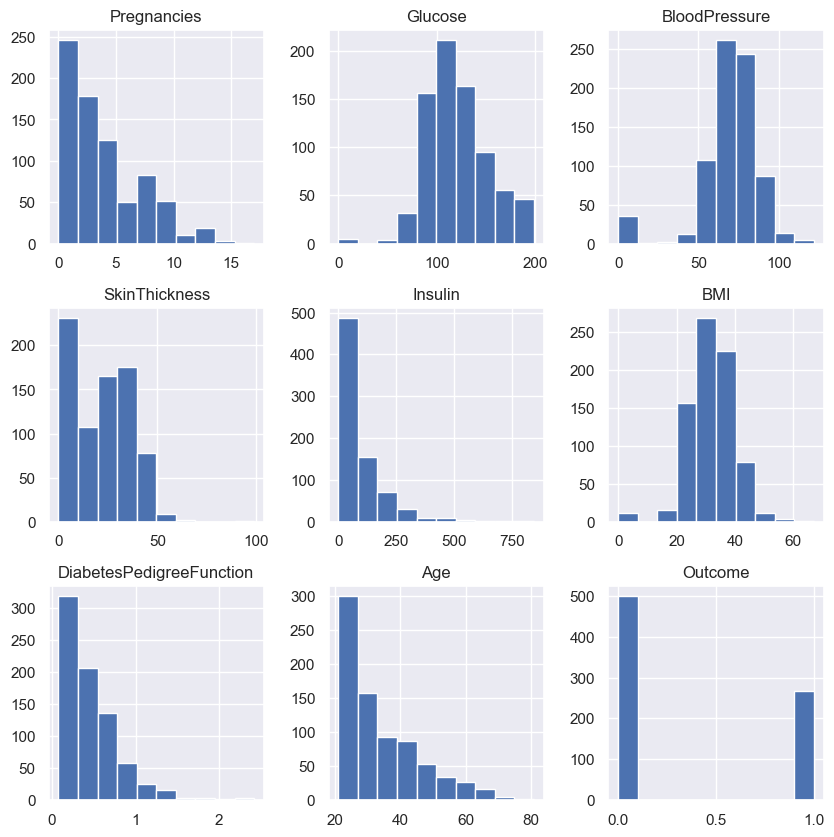

In [12]:
p = df.hist(figsize = (10,10))

In [13]:
# imputing the mean value of the column to each missing value of that particular column.
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

Plotting the distributions after removing the NAN values.

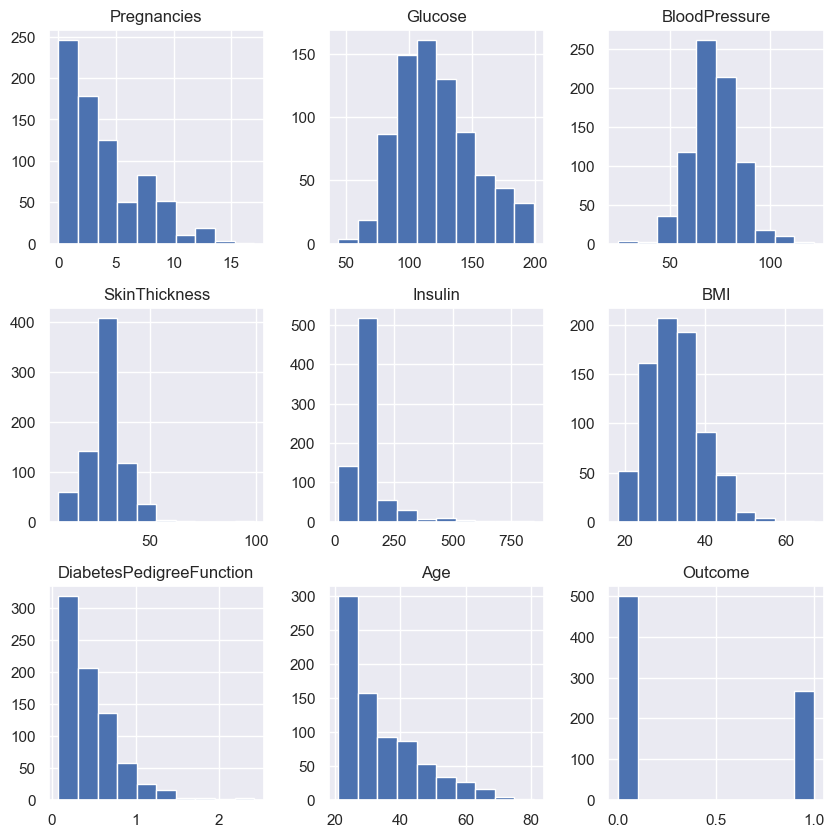

In [14]:
p = df_copy.hist(figsize = (10,10))

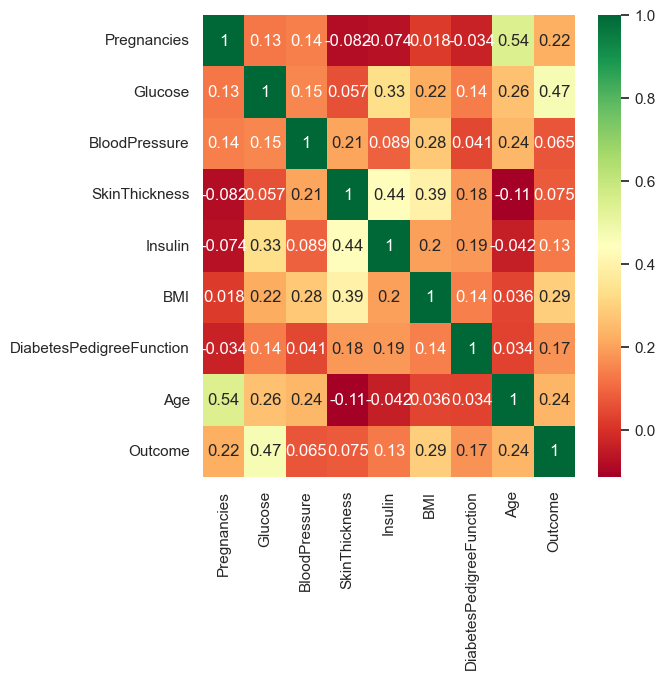

In [15]:
# Correlation between all the features
plt.figure(figsize=(6,6))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

From the heatmap we can observe that different features are not much correlated. Hence we don't need to drop any feature

# Applying Standard scaling

In [16]:
sc_X = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [17]:
y = df_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Checking data imbalance

In [18]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

As we can see, 1's has half the occurances as compared to 0's. So we need to apply certain techniques for balancing the labels
We will assign more weight to the minority class while defining our model parameters

# Model Building


##Spliting data into train and test set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25,
                                                    random_state=1)

##1. RandomForestClassifier
Here we are giving more weight to class '1' mainly because of two main reasons:
1. We have less no. of training examples with class '1' so we need to balance the dataset for better prediction
2. Person with diabetes should be diagnosed correctly in order to start early treatment



In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=8, class_weight={0:1,1:2})
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8)

In [21]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9357638888888888


We have truncated the tree depth to 10 to reduce overfitting


In [22]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8177083333333334


For dataset having imbalanced classes, accuracy is not a good metric to use. F1 score gives better insights in these type of cases

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print("Confusion matrix: \n",confusion_matrix(y_test, predictions))
print("F1 score is: ",np.round(f1_score(y_test,predictions),3))
print("Classification Report: \n",classification_report(y_test,predictions))

Confusion matrix: 
 [[103  20]
 [ 15  54]]
F1 score is:  0.755
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       123
           1       0.73      0.78      0.76        69

    accuracy                           0.82       192
   macro avg       0.80      0.81      0.81       192
weighted avg       0.82      0.82      0.82       192



## Decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5,class_weight={0:1,1:2})
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, max_depth=5)

In [25]:
dec_train = dtree.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, dec_train)))

Accuracy_Score = 0.8020833333333334


In [26]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7552083333333334


In [27]:
print("Confusion matrix: \n",confusion_matrix(y_test, predictions))
print("F1 score is: ",np.round(f1_score(y_test,predictions),3))
print("Classification Report: \n",classification_report(y_test,predictions))

Confusion matrix: 
 [[92 31]
 [16 53]]
F1 score is:  0.693
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       123
           1       0.63      0.77      0.69        69

    accuracy                           0.76       192
   macro avg       0.74      0.76      0.74       192
weighted avg       0.77      0.76      0.76       192



## XG Boost Classifier

In [38]:
from xgboost import XGBClassifier

# xgb_model = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,gamma=6)
xgb_model = XGBClassifier(max_depth=6, learning_rate=0.01, 
			n_estimators=100, 
			scale_pos_weight=2, 
      reg_lambda = 4)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
xgb_train = xgb_model.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, xgb_train)))

Accuracy_Score = 0.8559027777777778


In [40]:
from sklearn import metrics

predictions = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy Score = 0.7864583333333334


In [41]:
print("Confusion matrix: \n",confusion_matrix(y_test, predictions))
print("F1 score is: ",np.round(f1_score(y_test,predictions),3))
print("Classification Report: \n",classification_report(y_test,predictions))

Confusion matrix: 
 [[96 27]
 [14 55]]
F1 score is:  0.728
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       123
           1       0.67      0.80      0.73        69

    accuracy                           0.79       192
   macro avg       0.77      0.79      0.78       192
weighted avg       0.80      0.79      0.79       192



## Support vector Machine Classifier

In [42]:
from sklearn.svm import SVC
weights = {0:1.0, 1:2.0}
svc_model = SVC(class_weight=weights)
svc_model.fit(X_train, y_train)

SVC(class_weight={0: 1.0, 1: 2.0})

In [43]:
svc_train = svc_model.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, svc_train)))

Accuracy_Score = 0.8107638888888888


In [44]:
from sklearn import metrics
svc_pred = svc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8333333333333334


In [45]:
print("Confusion matrix: \n",confusion_matrix(y_test, svc_pred))
print("F1 score is: ",np.round(f1_score(y_test,svc_pred),3))
print("Classification Report: \n",classification_report(y_test, svc_pred))

Confusion matrix: 
 [[98 25]
 [ 7 62]]
F1 score is:  0.795
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       123
           1       0.71      0.90      0.79        69

    accuracy                           0.83       192
   macro avg       0.82      0.85      0.83       192
weighted avg       0.85      0.83      0.84       192



# Visualizing Feature Importance

<Axes: >

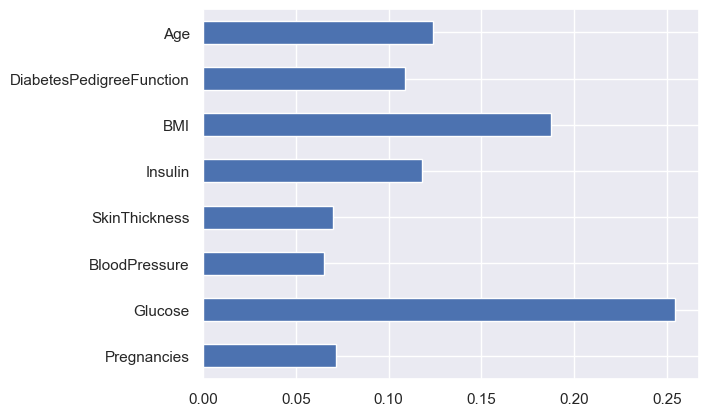

In [46]:
(pd.Series(rfc.feature_importances_, index=x.columns).plot(kind='barh'))

# Generating Predictions from different classifiers

In [47]:
test1=[[1,89,66,23,94,28.1,0.167,21]]  # True label = 0
test2=[[1,126,60,0,0,30.1,0.349,47]]   # True label = 1
test_1= pd.DataFrame(test1,columns= 
['Pregnancies','Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age'],dtype=float)
test_2= pd.DataFrame(test2,columns= 
['Pregnancies','Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age'],dtype=float)

In [48]:
p_rfc = rfc.predict(test_1)
print("True label : 0, Predicted label : ",p_rfc)
p_rfc = rfc.predict(test_2)
print("True label : 1, Predicted label : ",p_rfc)
p_dt = dtree.predict(test_1)
print("True label : 0, Predicted label : ",p_dt)
p_dt = dtree.predict(test_2)
print("True label : 1, Predicted label : ",p_dt)
p_xgb = xgb_model.predict(test_1)
print("True label : 0, Predicted label : ",p_xgb)
p_xgb = xgb_model.predict(test_2)
print("True label : 1, Predicted label : ",p_xgb)
p_svc = svc_model.predict(test_1)
print("True label : 0, Predicted label : ",p_svc)
p_svc = svc_model.predict(test_2)
print("True label : 1, Predicted label : ",p_svc)

True label : 0, Predicted label :  [1]
True label : 1, Predicted label :  [1]
True label : 0, Predicted label :  [1]
True label : 1, Predicted label :  [1]
True label : 0, Predicted label :  [1]
True label : 1, Predicted label :  [1]
True label : 0, Predicted label :  [0]
True label : 1, Predicted label :  [0]
